In [2]:
import pandas as pd

# Load the datasets
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

# Display the first few rows of each dataset
print("True News Dataset:")
print(true_df.head())
print("\nFake News Dataset:")
print(fake_df.head())


ParserError: Error tokenizing data. C error: EOF inside string starting at row 5802

In [3]:
import pandas as pd

# Load the datasets, handling potential quoting issues
true_df = pd.read_csv('True.csv', quoting=3, on_bad_lines='warn')  # quoting=3 tells pandas to ignore quotes
fake_df = pd.read_csv('Fake.csv', quoting=3, on_bad_lines='warn')

# Display the first few rows of each dataset
print("True News Dataset:")
print(true_df.head())
print("\nFake News Dataset:")
print(fake_df.head())

Skipping line 36: expected 60 fields, saw 84
Skipping line 68: expected 60 fields, saw 94
Skipping line 73: expected 60 fields, saw 130
Skipping line 87: expected 60 fields, saw 71
Skipping line 110: expected 60 fields, saw 65
Skipping line 111: expected 60 fields, saw 127
Skipping line 165: expected 60 fields, saw 62
Skipping line 177: expected 60 fields, saw 67
Skipping line 189: expected 60 fields, saw 61
Skipping line 234: expected 60 fields, saw 90
Skipping line 300: expected 60 fields, saw 87
Skipping line 379: expected 60 fields, saw 62
Skipping line 385: expected 60 fields, saw 68
Skipping line 393: expected 60 fields, saw 78
Skipping line 449: expected 60 fields, saw 63
Skipping line 561: expected 60 fields, saw 62
Skipping line 599: expected 60 fields, saw 73
Skipping line 655: expected 60 fields, saw 75
Skipping line 682: expected 60 fields, saw 71
Skipping line 694: expected 60 fields, saw 65
Skipping line 713: expected 60 fields, saw 62
Skipping line 764: expected 60 field

True News Dataset:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Skipping line 41: expected 44 fields, saw 46
Skipping line 60: expected 44 fields, saw 61
Skipping line 67: expected 44 fields, saw 65
Skipping line 76: expected 44 fields, saw 54
Skipping line 80: expected 44 fields, saw 46
Skipping line 81: expected 44 fields, saw 52
Skipping line 97: expected 44 fields, saw 46
Skipping line 125: expected 44 fields, saw 49
Skipping line 190: expected 44 fields, saw 47
Skipping line 194: expected 44 fields, saw 46
Skipping line 219: expected 44 fields, saw 47
Skipping line 277: expected 44 fields, saw 52
Skipping line 288: expected 44 fields, saw 45
Skipping line 291: expected 44 fields, saw 46
Skipping line 295: expected 44 fields, saw 47
Skipping line 298: expected 44 fields, saw 56
Skipping line 306: expected 44 fields, saw 47
Skipping line 338: expected 44 fields, saw 46
Skipping line 347: expected 44 fields, saw 50
Skipping line 353: expected 44 fields, saw 48
Skipping line 363: expected 44 fields, saw 45
Skipping line 367: expected 44 fields, sa

In [4]:
# Add a label column to each DataFrame
true_df['label'] = 1  # 1 for true news
fake_df['label'] = 0  # 0 for fake news

# Display the first few rows to confirm
print("True News Dataset with Label:")
print(true_df.head())
print("\nFake News Dataset with Label:")
print(fake_df.head())


True News Dataset with Label:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [5]:
# Combine the datasets
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

# Display the first few rows of the combined dataset
print("Combined Dataset:")
print(combined_df.head())


Combined Dataset:
                                               title          text  \
0   and wildfires in California. The package far ...  politicsNews   
1                                                NaN           NaN   
2                                                NaN           NaN   
3                                                NaN           NaN   
4                                                NaN           NaN   

        subject     date  label  
0  "December 31   2017 "      1  
1           NaN      NaN      1  
2           NaN      NaN      1  
3           NaN      NaN      1  
4           NaN      NaN      1  


Shape of the combined dataset: (10088, 5)

First few rows of the combined dataset:
                                               title          text  \
0   and wildfires in California. The package far ...  politicsNews   
1                                                NaN           NaN   
2                                                NaN           NaN   
3                                                NaN           NaN   
4                                                NaN           NaN   

        subject     date  label  
0  "December 31   2017 "      1  
1           NaN      NaN      1  
2           NaN      NaN      1  
3           NaN      NaN      1  
4           NaN      NaN      1  

Last few rows of the combined dataset:
      title text subject date  label
10083   NaN  NaN     NaN  NaN      0
10084   NaN  NaN     NaN  NaN      0
10085   NaN  NaN     NaN  NaN      0
10086   NaN  NaN     NaN  NaN      0
10087   NaN  NaN     NaN  NaN      0

Value counts for each label:


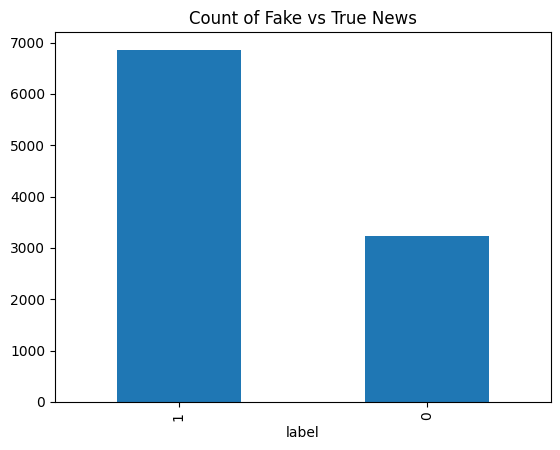

In [6]:
# Get the shape of the combined dataset
print(f"Shape of the combined dataset: {combined_df.shape}")

# Display the first few and last few rows
print("\nFirst few rows of the combined dataset:")
print(combined_df.head())

print("\nLast few rows of the combined dataset:")
print(combined_df.tail())

# Get the count of each label
print("\nValue counts for each label:")
print(combined_df['label'].value_counts())

# Optional: Plotting (if needed)
import matplotlib.pyplot as plt

# Plot the value counts
combined_df['label'].value_counts().plot(kind='bar', title='Count of Fake vs True News')
plt.show()


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Tokenization, lowercasing, removing stop words, and stemming/lemmatization
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Apply stemming or lemmatization (choose one)
    # stemmed = [ps.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

# Apply the cleaning function to the text data (assuming the column is 'text')
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Display the first few rows of the cleaned data
print("Cleaned Text Data:")
print(combined_df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


AttributeError: 'float' object has no attribute 'lower'

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Tokenization, lowercasing, removing stop words, and stemming/lemmatization
def clean_text(text):
    # Handle potential float values
    if isinstance(text, float):
        return ""  # Or any other appropriate handling for float values

    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Apply stemming or lemmatization (choose one)
    # stemmed = [ps.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

# Load the datasets, handling potential quoting issues
true_df = pd.read_csv('True.csv', quoting=3, on_bad_lines='warn')  # quoting=3 tells pandas to ignore quotes
fake_df = pd.read_csv('Fake.csv', quoting=3, on_bad_lines='warn')

# Add a label column to each DataFrame
true_df['label'] = 1  # 1 for true news
fake_df['label'] = 0  # 0 for fake news

# Combine the datasets
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

# Apply the cleaning function to the text data
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Display the first few rows of the cleaned data
print("Cleaned Text Data:")
print(combined_df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Skipping line 36: expected 60 fields, saw 84
Skipping line 68: expected 60 fields, saw 94
Skipping line 73: expected 60 fields, saw 130
Skipping line 87: expected 60 fields, saw 71
Skipping line 110: expected 60 fields, saw 65
Skipping line 111: expected 60 fields, saw 127
Skipping line 165: expected 60 fields, saw 62
Skipping line 177: expected 60 fields, saw 67
Skipping line 189: expected 60 fields, saw 61
Skipping line 234: expected 60 fields, saw 90
Skipping line 300: expected 60 fields, saw 87
Skipping line 379: expected 60 fields, saw 62
Skipping line 385: expected 60 fields, saw 68
Skipping line 393: expected 60 fields, saw 78
Skipping line

Cleaned Text Data:
           text  cleaned_text
0  politicsNews  politicsnews
1           NaN              
2           NaN              
3           NaN              
4           NaN              


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['cleaned_text'])

# Display the shape of the TF-IDF matrix
print(f"Shape of the TF-IDF matrix: {tfidf_matrix.shape}")


Shape of the TF-IDF matrix: (22917, 21)
